#Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder

#Import the Datasets

##Customerdata_Train

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Read the Customer data path

Customerdata_filepath = r'/content/drive/MyDrive/CAPSTONE/Test/Customerdata_Test.xlsx'

In [ ]:
# Read the excel file

customerdata = pd.read_excel(Customerdata_filepath)

In [ ]:
# Print the first five rows of the data

customerdata.head(10)

,CustomerID,City,DateOfRegistration,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay
0,C17838,CITY4,2010-10-22,0,0,0,Thursday
1,C12403,CITY2,2008-11-17,1,1,0,Wednesday
2,C19041,CITY4,2011-01-24,0,1,0,Friday
3,C24069,CITY2,2010-09-18,0,0,0,Wednesday
4,C26718,CITY2,2010-10-02,1,0,0,Monday
5,C31010,CITY2,2010-04-24,0,0,0,Tuesday
6,C24517,CITY2,2010-07-24,0,0,0,Thursday
7,C30981,CITY4,2011-02-09,0,0,0,Thursday
8,C23833,CITY2,2010-08-27,0,0,0,Wednesday
9,C25929,CITY2,2010-06-16,0,0,0,Wednesday


In [ ]:
# Check the shape of the data

customerdata.shape

(5955, 7)

In [ ]:
#info method returns a concise summary of the data.

customerdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5955 entries, 0 to 5954
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   CustomerID            5955 non-null   object        
 1   City                  5955 non-null   object        
 2   DateOfRegistration    5955 non-null   datetime64[ns]
 3   OnlineCommunication   5955 non-null   int64         
 4   AutomaticRefill       5955 non-null   int64         
 5   DoorstepDelivery      5955 non-null   int64         
 6   PreferredDeliveryDay  5955 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 325.8+ KB


In [ ]:
#Describe function to generate a statistical summary that describes the data.

customerdata.describe()

,OnlineCommunication,AutomaticRefill,DoorstepDelivery
count,5955.000000,5955.000000,5955.000000
mean,0.659278,0.095046,0.038959
std,0.473992,0.293303,0.193513
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000
75%,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000


In [ ]:
#Describe function to generate a statistical summary that describes the categorical data.

customerdata.describe(include='O')

,CustomerID,City,PreferredDeliveryDay
count,5955,5955,5955
unique,5955,4,7
top,C17838,CITY4,Monday
freq,1,2278,1350


In [ ]:
#Check the null values

customerdata.isnull().sum()

CustomerID              0
City                    0
DateOfRegistration      0
OnlineCommunication     0
AutomaticRefill         0
DoorstepDelivery        0
PreferredDeliveryDay    0
dtype: int64

In [ ]:
def process_date_columns(df, date_col):
    
    # Convert the date column to string
    df[date_col] = df[date_col].astype(str)

    # Apply strptime() to each string in the date column
    df[date_col] = df[date_col].apply(lambda x: datetime.strptime(x, "%Y-%m-%d"))

    # Extract the year, month, and day values from the datetime objects
    df[f'{date_col}_Year'] = df[date_col].apply(lambda x: x.year)
    df[f'{date_col}_Month'] = df[date_col].apply(lambda x: x.month)
    df[f'{date_col}_Day'] = df[date_col].apply(lambda x: x.day)

    # Return the modified dataframe
    return df


In [ ]:
# Asign the extracted columns to cutomerdata

customerdata = process_date_columns(customerdata, 'DateOfRegistration')

In [ ]:
# Print the first five rows

customerdata.head()

,CustomerID,City,DateOfRegistration,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,DateOfRegistration_Year,DateOfRegistration_Month,DateOfRegistration_Day
0,C17838,CITY4,2010-10-22,0,0,0,Thursday,2010,10,22
1,C12403,CITY2,2008-11-17,1,1,0,Wednesday,2008,11,17
2,C19041,CITY4,2011-01-24,0,1,0,Friday,2011,1,24
3,C24069,CITY2,2010-09-18,0,0,0,Wednesday,2010,9,18
4,C26718,CITY2,2010-10-02,1,0,0,Monday,2010,10,2


In [ ]:
# Print the info of the data

customerdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5955 entries, 0 to 5954
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   CustomerID                5955 non-null   object        
 1   City                      5955 non-null   object        
 2   DateOfRegistration        5955 non-null   datetime64[ns]
 3   OnlineCommunication       5955 non-null   int64         
 4   AutomaticRefill           5955 non-null   int64         
 5   DoorstepDelivery          5955 non-null   int64         
 6   PreferredDeliveryDay      5955 non-null   object        
 7   DateOfRegistration_Year   5955 non-null   int64         
 8   DateOfRegistration_Month  5955 non-null   int64         
 9   DateOfRegistration_Day    5955 non-null   int64         
dtypes: datetime64[ns](1), int64(6), object(3)
memory usage: 465.4+ KB


##Emaildata_Train

In [ ]:
# Read the Email data path

Emaildata_filepath = r'/content/drive/MyDrive/CAPSTONE/Test/Emaildata_Test.xlsx'

In [ ]:
# Read the excel file

emaildata = pd.read_excel(Emaildata_filepath)

In [ ]:
# Print the first five rows of the data

emaildata.head()

,CustomerID,DateOfemail,EmailType,timestamp,MailOpened,MailClicked
0,C17838,2010-10-22,WelcomeEmail,16:59:02,yes,NotApplicable
1,C12403,2008-11-17,WelcomeEmail,12:46:56,yes,NotApplicable
2,C19041,2011-01-24,WelcomeEmail,14:35:22,yes,NotApplicable
3,C24069,2010-09-18,WelcomeEmail,12:25:26,yes,NotApplicable
4,C26718,2010-10-02,WelcomeEmail,11:55:58,yes,NotApplicable


In [ ]:
# Check the shape of the data

emaildata.shape

(129074, 6)

In [ ]:
# Check the value_counts of each eamil type

emaildata['EmailType'].value_counts()

CustomizedEmail    123119
WelcomeEmail         5955
Name: EmailType, dtype: int64

In [ ]:
#info method returns a concise summary of the data.

emaildata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129074 entries, 0 to 129073
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   CustomerID   129074 non-null  object
 1   DateOfemail  129074 non-null  object
 2   EmailType    129074 non-null  object
 3   timestamp    129074 non-null  object
 4   MailOpened   129074 non-null  object
 5   MailClicked  129074 non-null  object
dtypes: object(6)
memory usage: 5.9+ MB


In [ ]:
#Describe function to generate a statistical summary that describes the data.

emaildata.describe()

,CustomerID,DateOfemail,EmailType,timestamp,MailOpened,MailClicked
count,129074,129074,129074,129074,129074,129074
unique,5955,3149,2,14366,2,3
top,C14650,2013-10-02,CustomizedEmail,11:28:48,no,no
freq,280,545,123119,24,92296,116201


In [ ]:
#Check the null values

emaildata.isnull().sum()

CustomerID     0
DateOfemail    0
EmailType      0
timestamp      0
MailOpened     0
MailClicked    0
dtype: int64

##Test_Data

In [ ]:
# Read the Traindata path

Testdata_filepath = r'/content/drive/MyDrive/CAPSTONE/Test/Test.xlsx'

In [ ]:
# Read the excel file

testdata = pd.read_excel(Traindata_filepath)

In [ ]:
# Print the first five rows of the data

testdata.head()

,CustomerID
0,C12121
1,C12132
2,C12134
3,C12135
4,C12136


In [ ]:
# Check the shape of the data

testdata.shape

(5955, 1)

##Transactionsdata_Train

In [ ]:
# Read the Transactions data file path

Transactions_filepath = r'/content/drive/MyDrive/CAPSTONE/Test/transactionsdata_Test.xlsx'

In [ ]:
# Read the excel file

transactionsdata = pd.read_excel(Transactions_filepath)

In [ ]:
# Print the first five rows of the data

transactionsdata.head()

,CustomerID,DateOfOrder,timestamp,OrderQuantity
0,C17838,2011-03-28,17:41:08,55
1,C12403,2010-10-12,15:58:02,174
2,C12403,2010-11-27,20:13:48,171
3,C12403,2011-12-09,14:34:44,166
4,C12403,2011-03-04,18:20:18,179


In [ ]:
#Check the shape of the data

transactionsdata.shape

(26768, 4)

In [ ]:
#info method returns a concise summary of the data.

transactionsdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26768 entries, 0 to 26767
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CustomerID     26768 non-null  object
 1   DateOfOrder    26768 non-null  object
 2   timestamp      26768 non-null  object
 3   OrderQuantity  26768 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 836.6+ KB


In [ ]:
#Describe function to generate a statistical summary that describes the data.

transactionsdata.describe()

,OrderQuantity
count,26768.000000
mean,84.407763
std,50.794616
min,1.000000
25%,51.000000
50%,73.000000
75%,102.000000
max,501.000000


In [ ]:
#Check the null values

transactionsdata.isnull().sum()

CustomerID       0
DateOfOrder      0
timestamp        0
OrderQuantity    0
dtype: int64

# Data Preprocessing

## Customerdata_Train

In [ ]:
customerdata.head()

,CustomerID,City,DateOfRegistration,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,DateOfRegistration_Year,DateOfRegistration_Month,DateOfRegistration_Day
0,C17838,CITY4,2010-10-22,0,0,0,Thursday,2010,10,22
1,C12403,CITY2,2008-11-17,1,1,0,Wednesday,2008,11,17
2,C19041,CITY4,2011-01-24,0,1,0,Friday,2011,1,24
3,C24069,CITY2,2010-09-18,0,0,0,Wednesday,2010,9,18
4,C26718,CITY2,2010-10-02,1,0,0,Monday,2010,10,2


In [ ]:
# Drop the DateOfRegistration column

customerdata = customerdata.drop('DateOfRegistration', axis=1)

In [ ]:
# initialize the ordinal encoder
ordinal_encoder = OrdinalEncoder()

# fit and transform the categorical column
customerdata['City'] = ordinal_encoder.fit_transform(customerdata[['City']])

In [ ]:
# Fit the ordinal encoded column

customerdata['PreferredDeliveryDay'] = ordinal_encoder.fit_transform(customerdata[['PreferredDeliveryDay']])

In [ ]:
# Print the top five rows

customerdata.head()

,CustomerID,City,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,DateOfRegistration_Year,DateOfRegistration_Month,DateOfRegistration_Day
0,C17838,3.0,0,0,0,4.0,2010,10,22
1,C12403,1.0,1,1,0,6.0,2008,11,17
2,C19041,3.0,0,1,0,0.0,2011,1,24
3,C24069,1.0,0,0,0,6.0,2010,9,18
4,C26718,1.0,1,0,0,1.0,2010,10,2


## Emaildata_Train

In [ ]:
emaildata.head()

,CustomerID,DateOfemail,EmailType,timestamp,MailOpened,MailClicked
0,C17838,2010-10-22,WelcomeEmail,16:59:02,yes,NotApplicable
1,C12403,2008-11-17,WelcomeEmail,12:46:56,yes,NotApplicable
2,C19041,2011-01-24,WelcomeEmail,14:35:22,yes,NotApplicable
3,C24069,2010-09-18,WelcomeEmail,12:25:26,yes,NotApplicable
4,C26718,2010-10-02,WelcomeEmail,11:55:58,yes,NotApplicable


In [ ]:
# convert timestamp column to datetime object
emaildata['timestamp'] = pd.to_datetime(emaildata['timestamp'], format='%H:%M:%S')

# concatenate dateofemail and timestamp columns
emaildata['datetime'] = pd.to_datetime(emaildata['DateOfemail'].astype(str) + ' ' + emaildata['timestamp'].astype(str))

In [ ]:
emaildata.head()

,CustomerID,DateOfemail,EmailType,timestamp,MailOpened,MailClicked,datetime
0,C17838,2010-10-22,WelcomeEmail,1900-01-01 16:59:02,yes,NotApplicable,2010-10-22 16:59:02-01:00
1,C12403,2008-11-17,WelcomeEmail,1900-01-01 12:46:56,yes,NotApplicable,2008-11-17 12:46:56-01:00
2,C19041,2011-01-24,WelcomeEmail,1900-01-01 14:35:22,yes,NotApplicable,2011-01-24 14:35:22-01:00
3,C24069,2010-09-18,WelcomeEmail,1900-01-01 12:25:26,yes,NotApplicable,2010-09-18 12:25:26-01:00
4,C26718,2010-10-02,WelcomeEmail,1900-01-01 11:55:58,yes,NotApplicable,2010-10-02 11:55:58-01:00


In [ ]:
# calculate the counts of each email type for each customer
counts = emaildata.groupby(['CustomerID', 'EmailType'])['EmailType'].count().unstack(fill_value=0).add_prefix('EmailType_')

In [ ]:
# Convert DateOfemail column to datetime format
emaildata['datetime'] = pd.to_datetime(emaildata['datetime'])

# Group email dataset by CustomerID and get the minimum and maximum timestamps for each customer
min_max_df = emaildata.groupby('CustomerID')['datetime'].agg(['min', 'max'])

# Calculate time difference between first and last emails received by each customer
min_max_df['TimeDifference'] = (min_max_df['max'] - min_max_df['min']).dt.total_seconds()

# Rename columns for clarity
min_max_df = min_max_df.rename(columns={'min': 'FirstEmailDate', 'max': 'LastEmailDate'})


min_max_df.head()

,FirstEmailDate,LastEmailDate,TimeDifference
CustomerID,,,
C12121,2017-12-04 16:00:36-01:00,2017-12-13 16:29:20-01:00,779324.0
C12132,2013-10-20 13:59:08-01:00,2013-10-20 13:59:08-01:00,0.0
C12134,2013-09-18 13:21:28-01:00,2013-09-18 13:21:28-01:00,0.0
C12135,2017-11-01 16:47:42-01:00,2018-01-10 13:42:12-01:00,6036870.0
C12136,2013-09-28 12:22:30-01:00,2013-10-19 15:11:16-01:00,1824526.0


In [ ]:
# Convert time difference from seconds to days
min_max_df['TimeDifference'] = min_max_df['TimeDifference'] / (86400)

In [ ]:
min_max_df.head()

,FirstEmailDate,LastEmailDate,TimeDifference
CustomerID,,,
C12121,2017-12-04 16:00:36-01:00,2017-12-13 16:29:20-01:00,9.019954
C12132,2013-10-20 13:59:08-01:00,2013-10-20 13:59:08-01:00,0.000000
C12134,2013-09-18 13:21:28-01:00,2013-09-18 13:21:28-01:00,0.000000
C12135,2017-11-01 16:47:42-01:00,2018-01-10 13:42:12-01:00,69.871181
C12136,2013-09-28 12:22:30-01:00,2013-10-19 15:11:16-01:00,21.117199


In [ ]:
min_max_df['TimeDifference'] = min_max_df['TimeDifference'].apply(round)

In [ ]:
min_max_df.head()

,FirstEmailDate,LastEmailDate,TimeDifference
CustomerID,,,
C12121,2017-12-04 16:00:36-01:00,2017-12-13 16:29:20-01:00,9
C12132,2013-10-20 13:59:08-01:00,2013-10-20 13:59:08-01:00,0
C12134,2013-09-18 13:21:28-01:00,2013-09-18 13:21:28-01:00,0
C12135,2017-11-01 16:47:42-01:00,2018-01-10 13:42:12-01:00,70
C12136,2013-09-28 12:22:30-01:00,2013-10-19 15:11:16-01:00,21


In [ ]:
min_max_df = min_max_df.drop(['FirstEmailDate', 'LastEmailDate'], axis=1)

In [ ]:
min_max_df.shape

(5955, 1)

In [ ]:
# count the number of 'yes' and 'no' entries for each customer and merge the counts with the opens/clicks data
counts1 = pd.concat([
    emaildata.groupby('CustomerID').agg({
        'MailOpened': lambda x: sum(x == 'yes'),
        'MailClicked': lambda x: sum(x == 'yes')
    }),
    emaildata.groupby('CustomerID').agg({
        'MailOpened': lambda x: sum(x == 'no')
    }).rename(columns={'MailOpened': 'MailOpened_no'}),
    emaildata.groupby('CustomerID').agg({
        'MailClicked': lambda x: sum(x == 'no')
    }).rename(columns={'MailClicked': 'MailClicked_no'}),
    emaildata.groupby('CustomerID').agg({
        'MailClicked': lambda x: sum(x == 'NotApplicable')
    }).rename(columns={'MailClicked': 'MailClicked_NotApplicable'})
], axis=1)

# select the columns of interest and rename them
counts1 = counts1[['MailOpened', 'MailOpened_no', 'MailClicked', 'MailClicked_no', 'MailClicked_NotApplicable']]
counts1.columns = ['MailOpened_yes', 'MailOpened_no', 'MailClicked_yes', 'MailClicked_no', 'MailClicked_notapplicable']

In [ ]:
# calculate the count of emails for each customer
email_count = emaildata.groupby('CustomerID')['timestamp'].count().rename('email_count')

In [ ]:
# drop the intermediate columns if desired
emaildata = emaildata.drop(['DateOfemail', 'timestamp'], axis=1)

In [ ]:
# Concate the the counts, counts1, min_max_timestamp, min_max_date, email_count datasets to one dataframe

emaildata1 = pd.concat([counts, counts1, min_max_df, email_count], axis=1)

emaildata1.head()

,EmailType_CustomizedEmail,EmailType_WelcomeEmail,MailOpened_yes,MailOpened_no,MailClicked_yes,MailClicked_no,MailClicked_notapplicable,TimeDifference,email_count
CustomerID,,,,,,,,,
C12121,24,1,9,16,3,21,1,9,25
C12132,0,1,1,0,0,0,1,0,1
C12134,0,1,1,0,0,0,1,0,1
C12135,29,1,9,21,5,24,1,70,30
C12136,41,1,4,38,1,40,1,21,42


In [ ]:
for index in emaildata1['email_count'].value_counts(normalize=False).index:
    print(f"Count of {index}: {emaildata1['email_count'].value_counts(normalize=False)[index]}")

Count of 1: 2457
Count of 46: 346
Count of 45: 195
Count of 47: 137
Count of 41: 128
Count of 37: 126
Count of 48: 125
Count of 44: 120
Count of 42: 119
Count of 17: 115
Count of 43: 113
Count of 39: 105
Count of 36: 104
Count of 38: 97
Count of 40: 97
Count of 33: 93
Count of 32: 89
Count of 34: 82
Count of 49: 80
Count of 35: 76
Count of 31: 75
Count of 30: 71
Count of 27: 51
Count of 28: 48
Count of 29: 47
Count of 19: 45
Count of 3: 42
Count of 24: 40
Count of 50: 38
Count of 51: 36
Count of 26: 34
Count of 52: 31
Count of 20: 31
Count of 11: 30
Count of 53: 30
Count of 2: 29
Count of 4: 27
Count of 25: 26
Count of 22: 25
Count of 12: 24
Count of 9: 24
Count of 23: 23
Count of 18: 23
Count of 7: 23
Count of 21: 22
Count of 13: 21
Count of 5: 21
Count of 14: 21
Count of 6: 19
Count of 57: 18
Count of 8: 18
Count of 54: 17
Count of 55: 16
Count of 56: 16
Count of 10: 14
Count of 16: 9
Count of 15: 9
Count of 58: 8
Count of 61: 8
Count of 59: 7
Count of 60: 7
Count of 62: 4
Count of 6

In [ ]:
# Check the null values
emaildata1.isnull().sum()

EmailType_CustomizedEmail    0
EmailType_WelcomeEmail       0
MailOpened_yes               0
MailOpened_no                0
MailClicked_yes              0
MailClicked_no               0
MailClicked_notapplicable    0
TimeDifference               0
email_count                  0
dtype: int64

In [ ]:
#Check the shape
emaildata1.shape

(5955, 9)

## Transactionsdata_Train

In [ ]:
# Print the top 5 rows
transactionsdata.head()

,CustomerID,DateOfOrder,timestamp,OrderQuantity
0,C17838,2011-03-28,17:41:08,55
1,C12403,2010-10-12,15:58:02,174
2,C12403,2010-11-27,20:13:48,171
3,C12403,2011-12-09,14:34:44,166
4,C12403,2011-03-04,18:20:18,179


In [ ]:
# convert timestamp column to datetime object
transactionsdata['timestamp'] = pd.to_datetime(transactionsdata['timestamp'], format='%H:%M:%S')

# concatenate dateofemail and timestamp columns
transactionsdata['transactions_datetime'] = pd.to_datetime(transactionsdata['DateOfOrder'].astype(str) + ' ' + transactionsdata['timestamp'].astype(str))

In [ ]:
transactionsdata.head()

,CustomerID,DateOfOrder,timestamp,OrderQuantity,transactions_datetime
0,C17838,2011-03-28,1900-01-01 17:41:08,55,2011-03-28 17:41:08-01:00
1,C12403,2010-10-12,1900-01-01 15:58:02,174,2010-10-12 15:58:02-01:00
2,C12403,2010-11-27,1900-01-01 20:13:48,171,2010-11-27 20:13:48-01:00
3,C12403,2011-12-09,1900-01-01 14:34:44,166,2011-12-09 14:34:44-01:00
4,C12403,2011-03-04,1900-01-01 18:20:18,179,2011-03-04 18:20:18-01:00


In [ ]:
# Convert DateOfemail column to datetime format
transactionsdata['transactions_datetime'] = pd.to_datetime(transactionsdata['transactions_datetime'])

# Group email dataset by CustomerID and get the minimum and maximum timestamps for each customer
min_max_df1 = transactionsdata.groupby('CustomerID')['transactions_datetime'].agg(['min', 'max'])

# Calculate time difference between first and last emails received by each customer
min_max_df1['Orders_TimeDifference'] = (min_max_df1['max'] - min_max_df1['min']).dt.total_seconds()

# Rename columns for clarity
min_max_df1 = min_max_df1.rename(columns={'min': 'FirstOrder', 'max': 'LastOrder'})


min_max_df1.head()

,FirstOrder,LastOrder,Orders_TimeDifference
CustomerID,,,
C12121,2017-12-14 11:38:00-01:00,2017-12-14 11:38:00-01:00,0.0
C12132,2013-10-20 17:52:44-01:00,2013-10-20 17:52:44-01:00,0.0
C12134,2013-09-18 10:24:48-01:00,2013-09-18 10:24:48-01:00,0.0
C12135,2018-01-10 19:33:58-01:00,2018-01-10 19:33:58-01:00,0.0
C12136,2013-10-19 20:51:18-01:00,2013-10-19 20:51:18-01:00,0.0


In [ ]:
# Convert time difference from seconds to days
min_max_df1['Orders_TimeDifference'] = min_max_df1['Orders_TimeDifference'] / (86400)

In [ ]:
min_max_df1.head()

,FirstOrder,LastOrder,Orders_TimeDifference
CustomerID,,,
C12121,2017-12-14 11:38:00-01:00,2017-12-14 11:38:00-01:00,0.0
C12132,2013-10-20 17:52:44-01:00,2013-10-20 17:52:44-01:00,0.0
C12134,2013-09-18 10:24:48-01:00,2013-09-18 10:24:48-01:00,0.0
C12135,2018-01-10 19:33:58-01:00,2018-01-10 19:33:58-01:00,0.0
C12136,2013-10-19 20:51:18-01:00,2013-10-19 20:51:18-01:00,0.0


In [ ]:
# Apply round funtion to roundof the days
min_max_df1['Orders_TimeDifference'] = min_max_df1['Orders_TimeDifference'].apply(round)

In [ ]:
min_max_df1.head()

,FirstOrder,LastOrder,Orders_TimeDifference
CustomerID,,,
C12121,2017-12-14 11:38:00-01:00,2017-12-14 11:38:00-01:00,0
C12132,2013-10-20 17:52:44-01:00,2013-10-20 17:52:44-01:00,0
C12134,2013-09-18 10:24:48-01:00,2013-09-18 10:24:48-01:00,0
C12135,2018-01-10 19:33:58-01:00,2018-01-10 19:33:58-01:00,0
C12136,2013-10-19 20:51:18-01:00,2013-10-19 20:51:18-01:00,0


In [ ]:
# drop the unncessary columns
min_max_df1 = min_max_df1.drop(['FirstOrder', 'LastOrder'], axis=1)

In [ ]:
#print the shape
min_max_df1.shape

(5955, 1)

In [ ]:
# Asign the extracted columns to transactionsdata

transactionsdata = process_date_columns(transactionsdata, 'DateOfOrder')
transactionsdata.head()

,CustomerID,DateOfOrder,timestamp,OrderQuantity,transactions_datetime,DateOfOrder_Year,DateOfOrder_Month,DateOfOrder_Day
0,C17838,2011-03-28,1900-01-01 17:41:08,55,2011-03-28 17:41:08-01:00,2011,3,28
1,C12403,2010-10-12,1900-01-01 15:58:02,174,2010-10-12 15:58:02-01:00,2010,10,12
2,C12403,2010-11-27,1900-01-01 20:13:48,171,2010-11-27 20:13:48-01:00,2010,11,27
3,C12403,2011-12-09,1900-01-01 14:34:44,166,2011-12-09 14:34:44-01:00,2011,12,9
4,C12403,2011-03-04,1900-01-01 18:20:18,179,2011-03-04 18:20:18-01:00,2011,3,4


In [ ]:
# Print the counr of orders based on registration year and find the mean of order quantity for each customer
features = transactionsdata.groupby('CustomerID').agg({
    'OrderQuantity': 'mean',
    'DateOfOrder_Year': 'count'
}).rename(columns={
    'OrderQuantity': 'OrderQuantity_mean',
    'DateOfOrder_Year': 'Orders_count'
})

In [ ]:
# Drop the unnessary columns
transactionsdata = transactionsdata.drop(['DateOfOrder','timestamp', 'OrderQuantity',	'transactions_datetime',
                                          'DateOfOrder_Year',	'DateOfOrder_Month',	'DateOfOrder_Day'], axis=1)

In [ ]:
transactions1 = pd.concat([min_max_df1, features], axis=1)

# Reset the index to convert the groupby object to a new DataFrame
transactions1 = transactions1.reset_index()

transactions1.head()

,CustomerID,Orders_TimeDifference,OrderQuantity_mean,Orders_count
0,C12121,0,52.0,1
1,C12132,0,40.0,1
2,C12134,0,40.0,1
3,C12135,0,41.0,1
4,C12136,0,79.0,1


In [ ]:
# Check for null values
transactions1.isnull().sum()

CustomerID               0
Orders_TimeDifference    0
OrderQuantity_mean       0
Orders_count             0
dtype: int64

In [ ]:
# print the shape
transactions1.shape

(5955, 4)

# Merged Data

In [ ]:
# Merge the datasets based on customerID
merged_data = pd.merge(customerdata, emaildata1, on="CustomerID")
merged_data = pd.merge(merged_data, transactions1, on="CustomerID")

In [ ]:
# print the top five rows
merged_data.head()

,CustomerID,City,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,DateOfRegistration_Year,DateOfRegistration_Month,DateOfRegistration_Day,EmailType_CustomizedEmail,...,MailOpened_yes,MailOpened_no,MailClicked_yes,MailClicked_no,MailClicked_notapplicable,TimeDifference,email_count,Orders_TimeDifference,OrderQuantity_mean,Orders_count
0,C17838,3.0,0,0,0,4.0,2010,10,22,0,...,1,0,0,0,1,0,1,0,55.000000,1
1,C12403,1.0,1,1,0,6.0,2008,11,17,46,...,38,9,7,39,1,1868,47,1190,175.815476,168
2,C19041,3.0,0,1,0,0.0,2011,1,24,60,...,27,34,4,56,1,1072,61,976,117.385246,122
3,C24069,1.0,0,0,0,6.0,2010,9,18,45,...,1,45,0,45,1,51,46,0,47.000000,1
4,C26718,1.0,1,0,0,1.0,2010,10,2,13,...,9,5,2,11,1,1198,14,1083,156.883721,129


In [ ]:
# print the shape
merged_data.shape

(5955, 21)

In [ ]:
# Print the unique values in each column

for i in merged_data:
    print('\n',"************",i,"**************",'\n',merged_data[i].unique())


 ************ CustomerID ************** 
 ['C17838' 'C12403' 'C19041' ... 'C38741' 'C20407' 'C27220']

 ************ City ************** 
 [3. 1. 2. 0.]

 ************ OnlineCommunication ************** 
 [0 1]

 ************ AutomaticRefill ************** 
 [0 1]

 ************ DoorstepDelivery ************** 
 [0 1]

 ************ PreferredDeliveryDay ************** 
 [4. 6. 0. 1. 5. 2. 3.]

 ************ DateOfRegistration_Year ************** 
 [2010 2008 2011 2009 2013 2012 2014 2015 2016 2017 2018]

 ************ DateOfRegistration_Month ************** 
 [10 11  1  9  4  7  2  8  6  5 12  3]

 ************ DateOfRegistration_Day ************** 
 [22 17 24 18  2  9 27 16  3 30  1 19  6  7 28 15 11 25 20 21  4 12 14 23
 10 26 29  5 31 13  8]

 ************ EmailType_CustomizedEmail ************** 
 [  0  46  60  45  13  31  40  16  18  47  38   2  67  72  51  27  32  41
  37  44  65  48  52   1  36  43  42  50   6  57  55  10  39  29  35   3
  49  11  17  61  34   8   5  56  54  28

In [ ]:
merged_data = merged_data.drop(['MailClicked_notapplicable','EmailType_WelcomeEmail'], axis=1)

In [ ]:
# Find the correlation matrix
corr_matrix = merged_data.corr()
corr_matrix

<ipython-input-83-14a2a6be7e88>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = merged_data.corr()


,City,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,DateOfRegistration_Year,DateOfRegistration_Month,DateOfRegistration_Day,EmailType_CustomizedEmail,MailOpened_yes,MailOpened_no,MailClicked_yes,MailClicked_no,TimeDifference,email_count,Orders_TimeDifference,OrderQuantity_mean,Orders_count
City,1.000000,0.030497,0.043201,-0.019936,-0.041253,0.067194,0.026359,-0.006078,-0.014710,-0.021203,-0.005971,-0.014834,-0.013403,-0.063329,-0.014710,-0.073433,-0.045297,-0.066239
OnlineCommunication,0.030497,1.000000,0.164119,0.113615,-0.062696,0.368158,0.331558,-0.042847,-0.140783,-0.005475,-0.163449,0.042358,-0.154900,-0.240966,-0.140783,-0.211155,-0.155962,-0.058910
AutomaticRefill,0.043201,0.164119,1.000000,0.204030,-0.010749,0.075819,0.070704,-0.040985,0.035503,0.112024,-0.018346,0.142690,0.016912,0.040684,0.035503,0.021891,-0.064206,0.139668
DoorstepDelivery,-0.019936,0.113615,0.204030,1.000000,-0.026549,0.064369,0.045713,-0.017432,0.056291,0.087503,0.019424,0.105418,0.044263,-0.002533,0.056291,-0.000303,0.035960,0.083606
PreferredDeliveryDay,-0.041253,-0.062696,-0.010749,-0.026549,1.000000,-0.006125,-0.049075,0.021244,0.004310,-0.020972,0.016385,-0.024604,0.008109,-0.024072,0.004310,-0.023734,-0.007593,-0.026605
DateOfRegistration_Year,0.067194,0.368158,0.075819,0.064369,-0.006125,1.000000,0.026597,-0.035588,-0.086721,-0.044655,-0.078459,-0.007368,-0.090584,-0.280630,-0.086721,-0.274709,-0.088901,-0.175188
DateOfRegistration_Month,0.026359,0.331558,0.070704,0.045713,-0.049075,0.026597,1.000000,-0.004392,-0.125279,-0.024557,-0.134851,0.033817,-0.137281,-0.162783,-0.125279,-0.153995,-0.131636,-0.107771
DateOfRegistration_Day,-0.006078,-0.042847,-0.040985,-0.017432,0.021244,-0.035588,-0.004392,1.000000,0.039237,0.019034,0.036129,0.006079,0.040588,0.020406,0.039237,0.005844,-0.008486,-0.001960
EmailType_CustomizedEmail,-0.014710,-0.140783,0.035503,0.056291,0.004310,-0.086721,-0.125279,0.039237,1.000000,0.539676,0.891395,0.451145,0.991658,0.462573,1.000000,0.345642,0.223629,0.278352
MailOpened_yes,-0.021203,-0.005475,0.112024,0.087503,-0.020972,-0.044655,-0.024557,0.019034,0.539676,1.000000,0.099505,0.746834,0.462474,0.334329,0.539676,0.286129,0.146197,0.269213


<ipython-input-84-7c1ad59d2147>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(merged_data.corr(), annot=True, cmap='PiYG')


<Axes: >

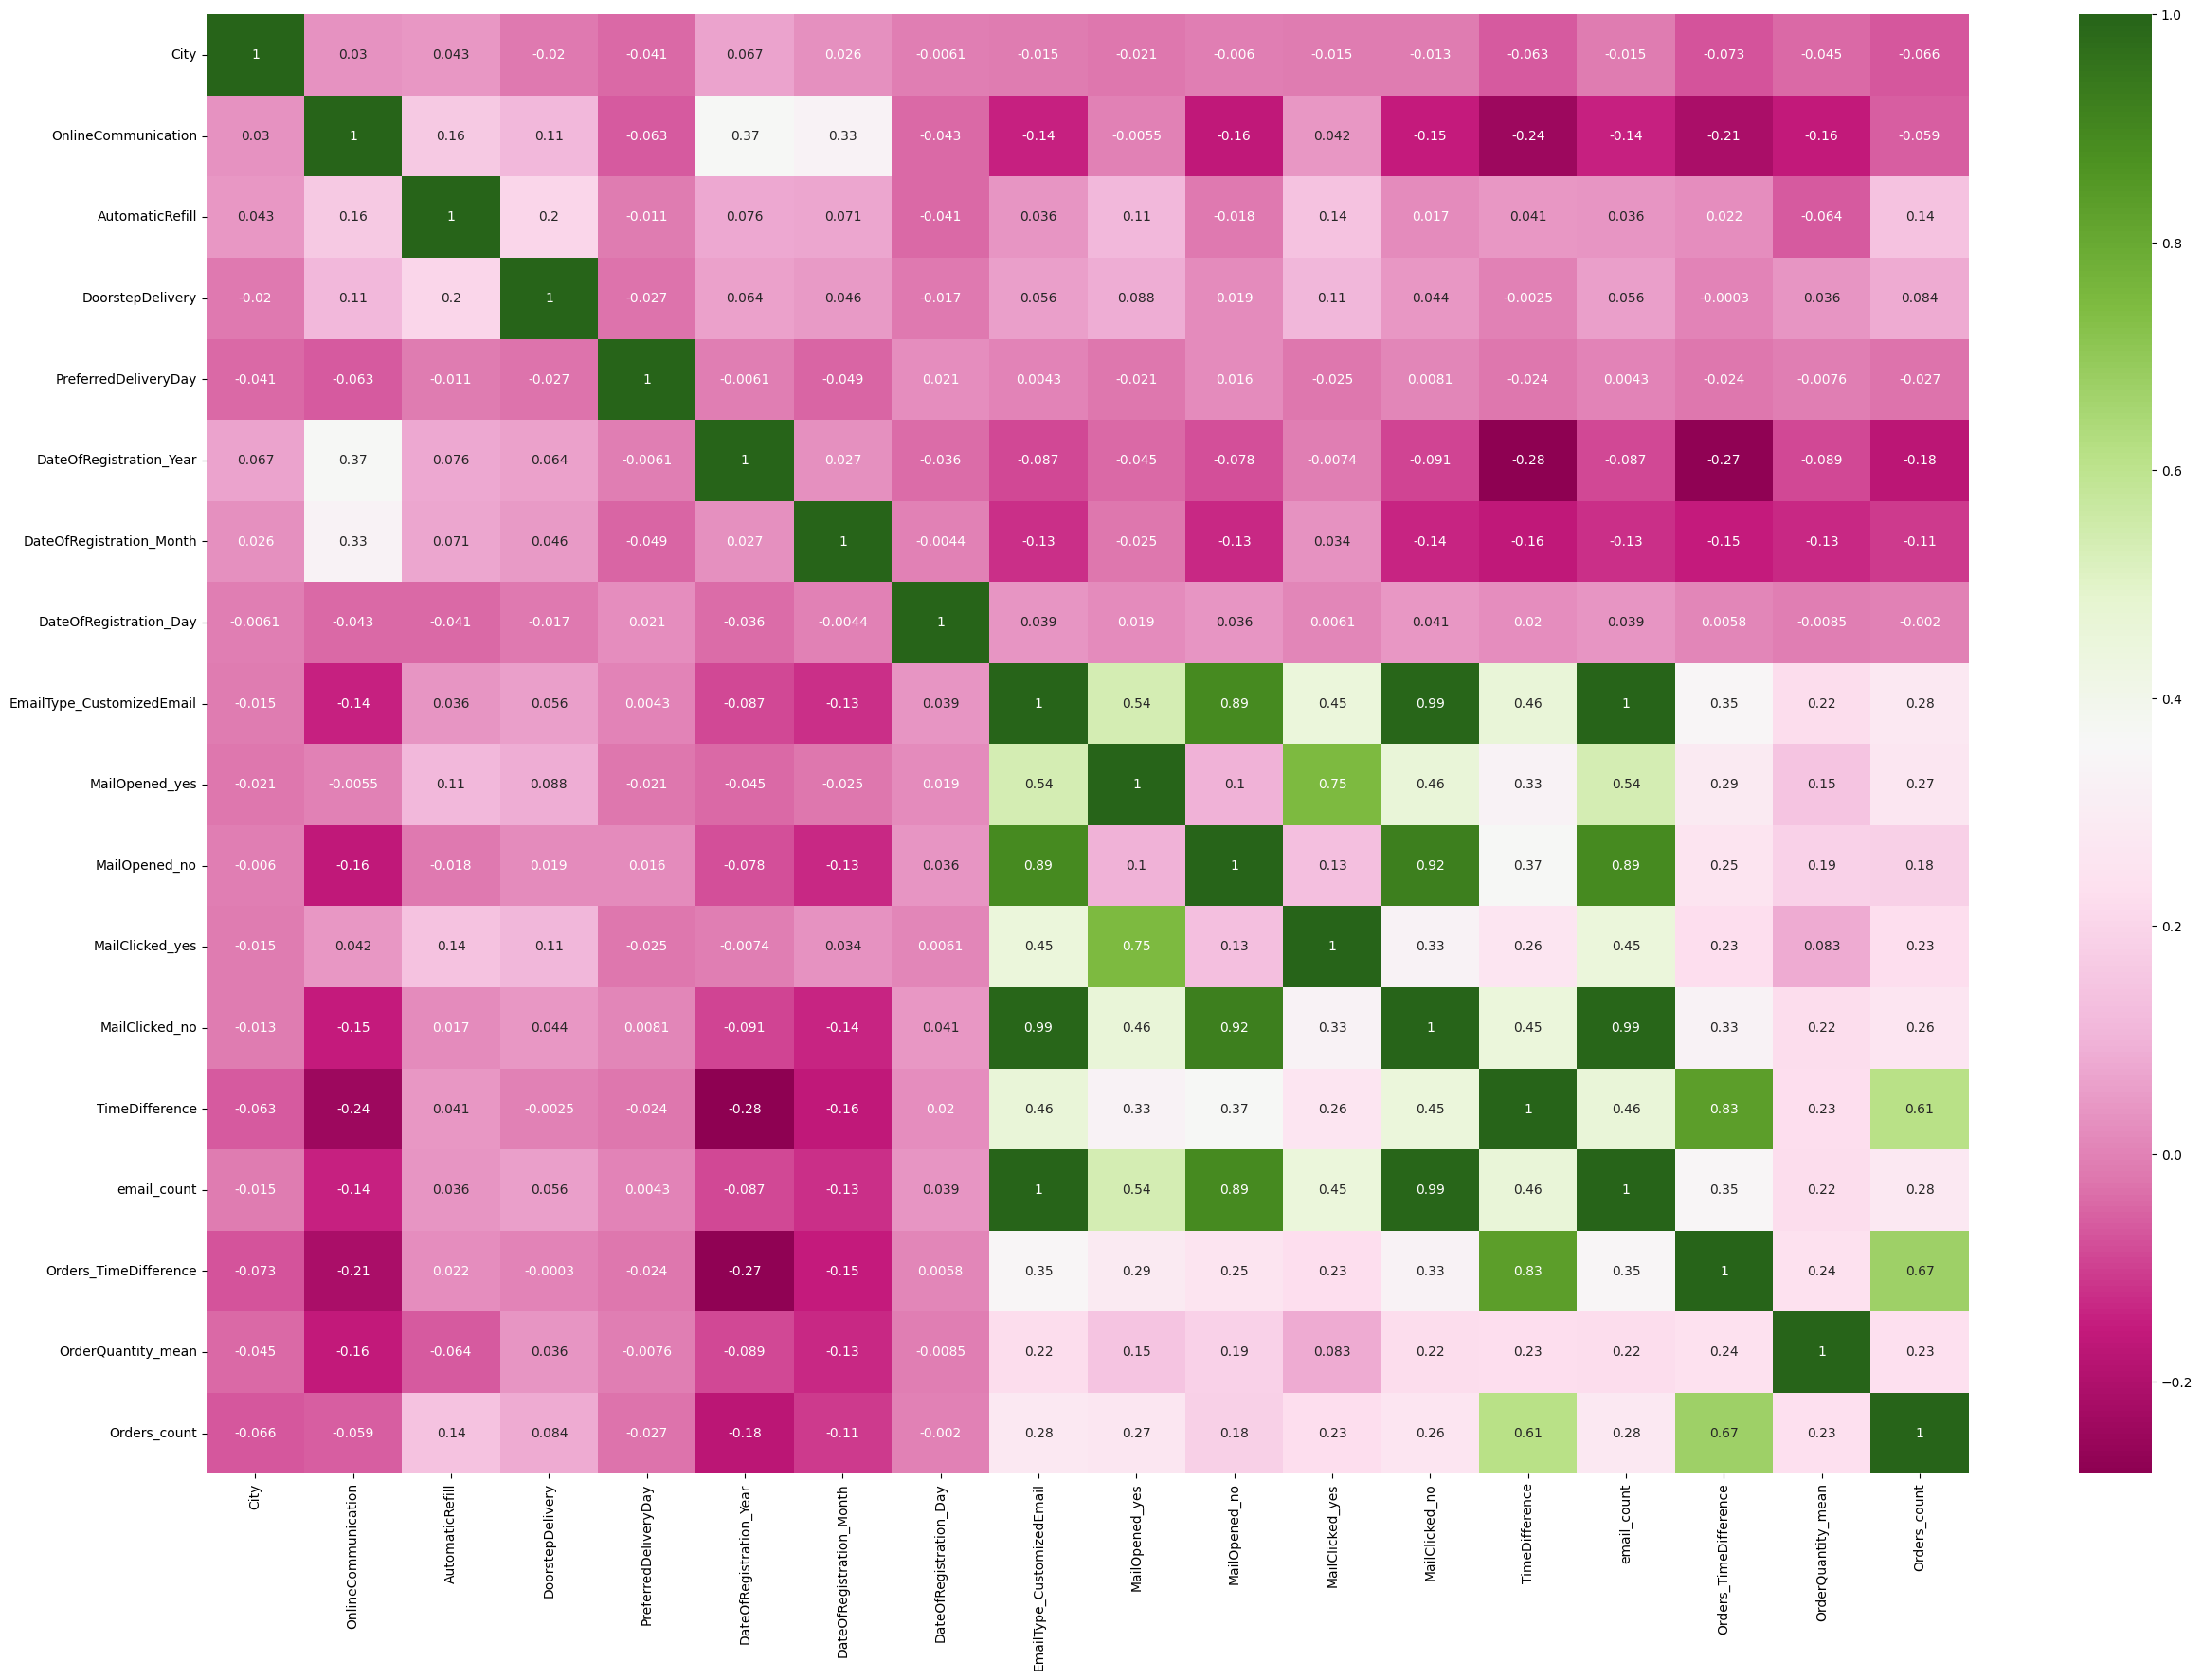

In [ ]:
# Plot the heatmap

plt.figure(figsize=(30,20))
sns.heatmap(merged_data.corr(), annot=True, cmap='PiYG')

In [ ]:
# Identify highly correlated columns
high_corr_cols = corr_matrix.abs().where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
high_corr_cols = high_corr_cols.stack().reset_index()
high_corr_cols.columns = ['col1', 'col2', 'correlation']
high_corr_cols = high_corr_cols[high_corr_cols['correlation'] > 0.9]


In [ ]:
# Print the highly correlated columns and the correlation

high_corr_cols

,col1,col2,correlation
111,EmailType_CustomizedEmail,MailClicked_no,0.991658
113,EmailType_CustomizedEmail,email_count,1.000000
126,MailOpened_no,MailClicked_no,0.923098
139,MailClicked_no,email_count,0.991658


In [ ]:
# Drop the highly correlated columns

merged_data = merged_data.drop(['MailClicked_no', 'MailClicked_no','email_count' ], axis=1)

In [ ]:
# Print the shape of the merged data

merged_data.shape

(5955, 17)

In [ ]:
# Print the columns of merged data

merged_data.columns

Index(['CustomerID', 'City', 'OnlineCommunication', 'AutomaticRefill',
       'DoorstepDelivery', 'PreferredDeliveryDay', 'DateOfRegistration_Year',
       'DateOfRegistration_Month', 'DateOfRegistration_Day',
       'EmailType_CustomizedEmail', 'MailOpened_yes', 'MailOpened_no',
       'MailClicked_yes', 'TimeDifference', 'Orders_TimeDifference',
       'OrderQuantity_mean', 'Orders_count'],
      dtype='object')

## Save the Preprocessed file

In [ ]:
# save the dataframe as a CSV file
merged_data.to_csv('Customer_segmentation_test.csv', index=False)